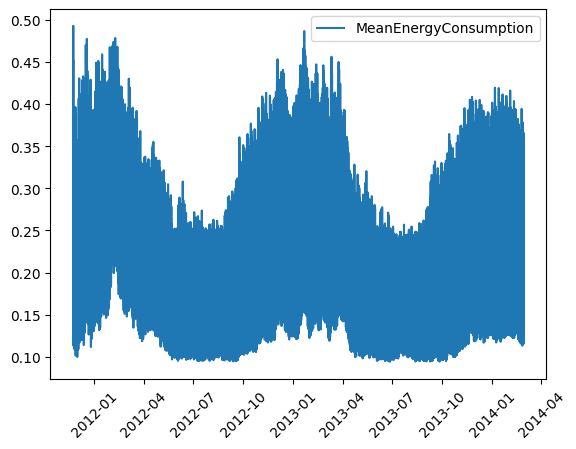

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet
# Load the data
df = pd.read_csv('D:\\bachelor\\merged_data.csv')

# Convert the 'utc_timestamp' column to datetime
df['DateTime'] = pd.to_datetime(df['DateTime'])

# Drop the first row
df = df.dropna()

df['day_of_week'] = df['DateTime'].dt.dayofweek
df['hour_of_day'] = df['DateTime'].dt.hour
df['month'] = df['DateTime'].dt.month

#plot the data
plt.plot(df['DateTime'], df['MeanEnergyConsumption'])
#update plot to have legend
plt.legend(['MeanEnergyConsumption'])
#rotate x-axis labels
plt.xticks(rotation=45)
plt.show()

16:19:45 - cmdstanpy - INFO - Chain [1] start processing
16:20:38 - cmdstanpy - INFO - Chain [1] done processing
d:\bachelor\BACH\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dates = pd.date_range(
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.
  0%|          | 0/98 [00:00<?, ?it/s]16:20:51 - cmdstanpy - INFO - Chain [1] start processing
16:20:54 - cmdstanpy - INFO - Chain [1] done processing
  1%|          | 1/98 [00:08<13:01,  8.05s/it]16:20:59 - cmdstanpy - INFO - Chain [1] start processing
16:21:02 - cmdstanpy - INFO - Chain [1] done processing
  2%|▏         | 2/98 [00:15<12:42,  7.94s/it]16:21:07 - cmdstanpy - INFO - Chain [1] start processing
16:21:11 - cmdstanpy - INFO - Chain [1] done processing
  3%|▎         | 3/98 [00:24<13:16,  8.39s/it]16:21:16 - cmdstanpy - INFO - Chain [1] start processing
16:21:20 - cmdstanpy - IN

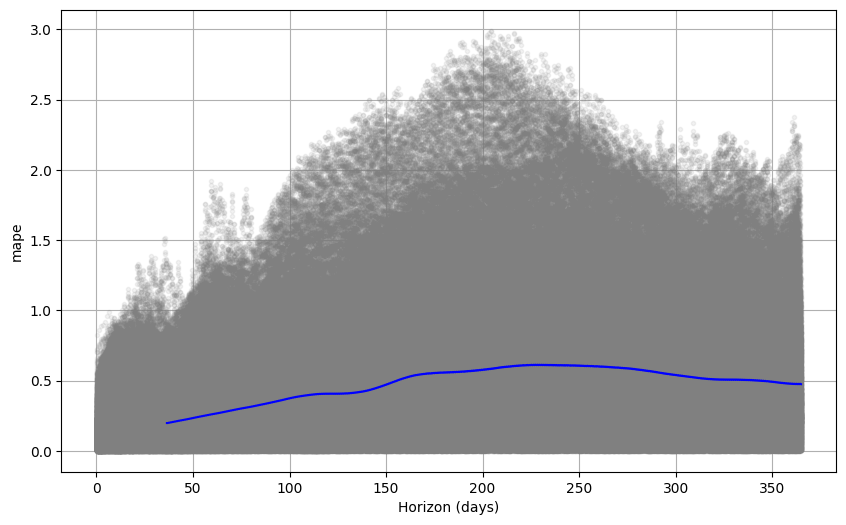

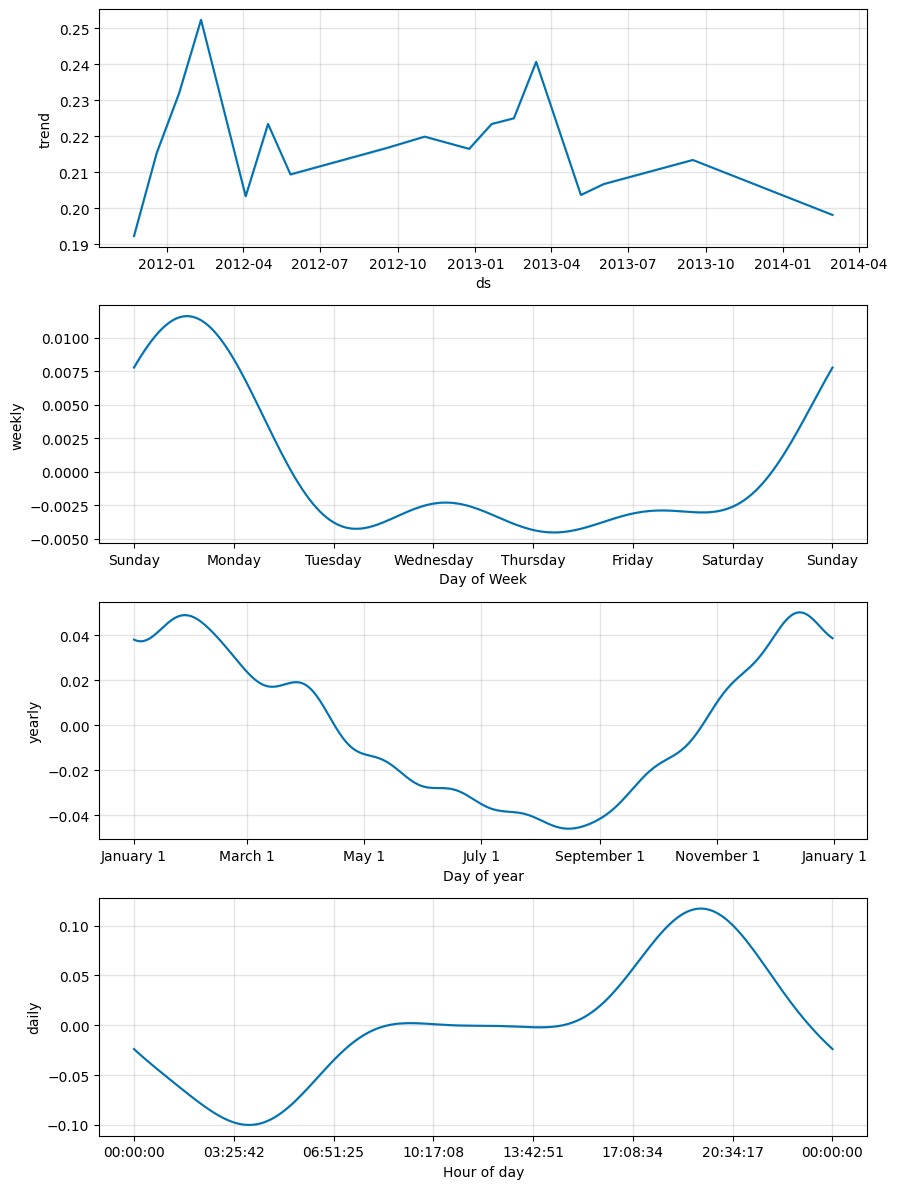

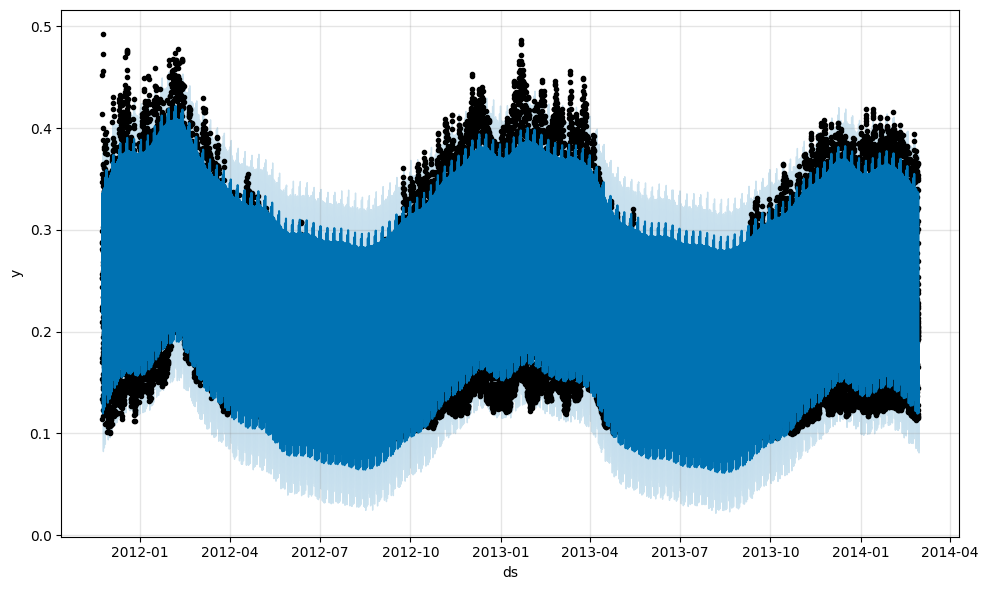

In [7]:
from prophet.diagnostics import cross_validation, performance_metrics
from prophet.plot import plot_cross_validation_metric

# Prophet requires columns ds (Date) and y (value)
df = df.rename(columns={'DateTime': 'ds', 'MeanEnergyConsumption': 'y'})

# Make the prophet model and fit on the data
m = Prophet(daily_seasonality=True,yearly_seasonality=True)
m = Prophet(seasonality_mode='multiplicative')

# Tune seasonality parameters
m = Prophet(seasonality_prior_scale=0.1)

m.fit(df)

# Predict for the next year
future = m.make_future_dataframe(periods=7, freq='H')
forecast = m.predict(future)


# Perform cross-validation
# initial: the size of the initial training period
# period: the spacing between cutoff dates
# horizon: the forecast horizon
df_cv = cross_validation(m, initial='365 days', period='1 days', horizon='365 days')

# Calculate performance metrics
df_p = performance_metrics(df_cv)

# Plot performance metrics
fig = plot_cross_validation_metric(df_cv, metric='mape')  # Mean Absolute Percentage Error





fig2 = m.plot_components(forecast)

# Plot the forecast
fig1 = m.plot(forecast)

plt.show()

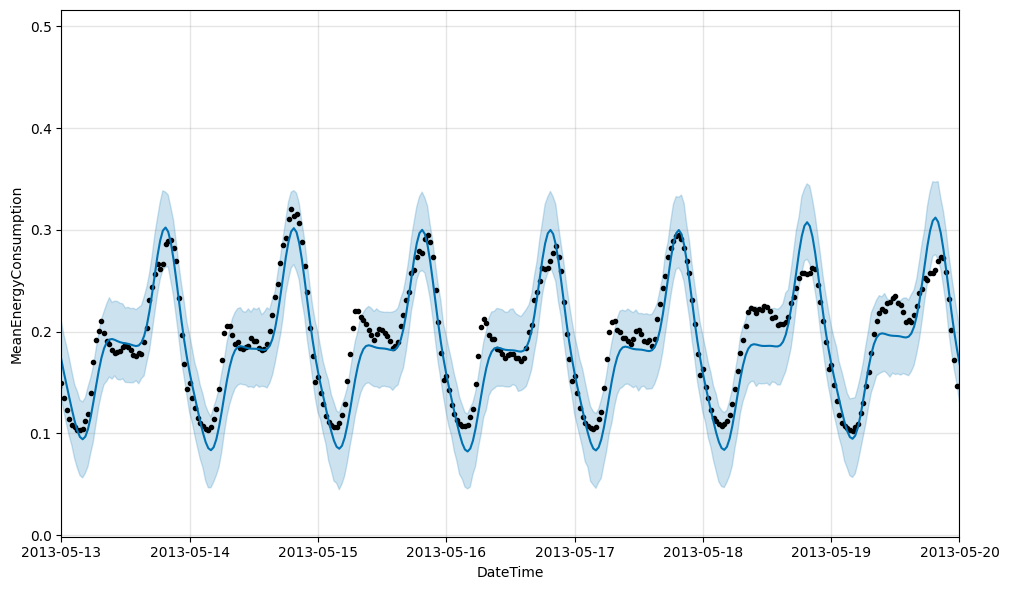

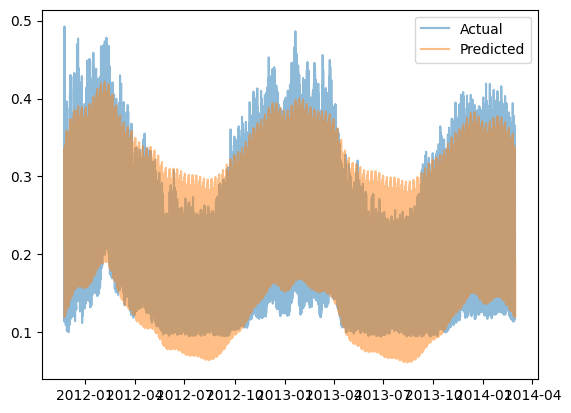

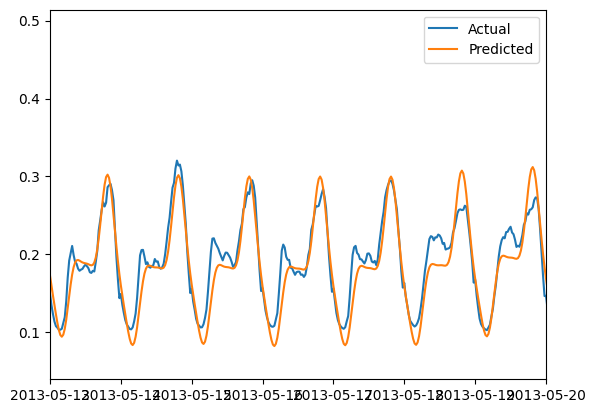

39727
39734
39727


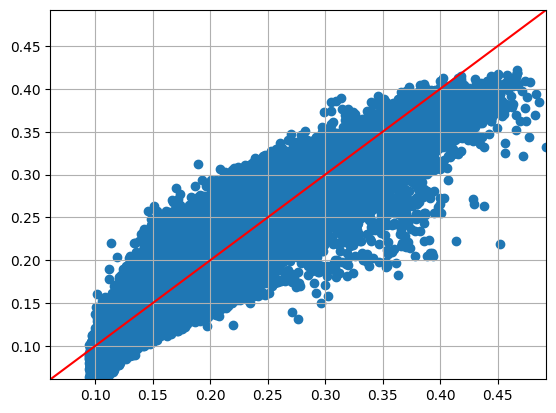

In [8]:
#only show a week of the forecast
fig2 = m.plot(forecast, xlabel='DateTime', ylabel='MeanEnergyConsumption')
plt.xlim(pd.Timestamp('2013-05-13'), pd.Timestamp('2013-05-20'))
plt.show()

# Plot both the actual data and the forecast with semi-transparency
plt.plot(df['ds'], df['y'], alpha=0.5)
plt.plot(forecast['ds'], forecast['yhat'], alpha=0.5)

# Add a legend
plt.legend(['Actual', 'Predicted'])

# Show the plot
plt.show()

#plot a week of acutal data and forecast
plt.plot(df['ds'], df['y'])
plt.plot(forecast['ds'], forecast['yhat'])
plt.xlim(pd.Timestamp('2013-05-13'), pd.Timestamp('2013-05-20'))
plt.legend(['Actual', 'Predicted'])
plt.show()


#get the length of the data
print(len(df))
print(len(forecast))
#drop the last 7 values from the forecast
forecast = forecast[:-7]
print(len(forecast))

# Create scatter plot of actual vs predicted
plt.scatter(df['y'], forecast['yhat'])

# Get the limits for x and y axes
lower_limit = min(min(df['y']), min(forecast['yhat']))
upper_limit = max(max(df['y']), max(forecast['yhat']))

# Set the same scale for both x and y axes
plt.xlim(lower_limit, upper_limit)
plt.ylim(lower_limit, upper_limit)

# Draw a 45-degree line
plt.plot([lower_limit, upper_limit], [lower_limit, upper_limit], 'r')

# Add a grid
plt.grid(True)

# Show the plot
plt.show()

